### Notebook structure

- **Instructions**:  set of important informations to understand the structure of the code and how to make it work.
- **Introduction**: explaining the problem and de fundamental concepts.
- **Excercise 08.01**: explaining the implementation and showing the expected results.
- **Excercise 08.02**: 
    - Showing a picture of the average energy of the Ground State (with statistical uncertainties) as a function of the SA steps of the algorithm
    - showing a picture of the estimation of the average energy of the Ground State and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize it.
    - showing  a picture of the sampled  the probeability denity function of the ground state.

# Instructions

Intruction to C++ compilation and executions .

- To compile the code run in the directory 'es_08.2' the command :  `make`. 
- To automatically execute the code run :  `make run`.
- To clear the files `.o`  please run `make clean`.
- All output files are contained in the directory `output`.

In [62]:
# fundamental packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from astropy import table
from astropy.io import ascii

import seaborn as sns

sns.set_theme(style='whitegrid')

# Introduction

The goal of this simulation is to find the optimal set of parameters that minimizes the energy of the system, thus approximating the ground state. We will use a Variational Monte Carlo approach to sample the wavefunction with different parameter values and evaluate the energy of the system. In particular we study a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
We consider the following expression for trial wave function parametrized by the set of variational parameters  $\sigma$ and $\mu$</span>
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$



# Excercise 08.1


We exploited the Metropolis algorithm to sample the square modulus of our trial wave function  using an uniform transition probability  $𝑇(𝑥_\text{𝑛𝑒𝑤}|𝑥_\text{𝑜𝑙𝑑})$. By using data blocking, we computed the expectation value for the Hamiltonia 
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$


To measure the expectation value $\hat{H} $ using Variational Monte Carlo, we need the analytical calculation of the local energy, which is given by:

$$
\hat H=V(x)+ K(x)\\
K(x)=\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}={-\frac{\hbar^2}{2m}}\frac1{\sigma^4}\left[x^2+\mu^2-\sigma^2-2\mu\sigma\tanh\left(\frac{\mu x}{\sigma^2}\right)\right]
$$

In this case I will consider $\hbar=1$ and $m=1$.

The expression for the local energy $E_L$ is crucial in the Variational Monte Carlo (VMC) method as it represents the energy of the system at a given configuration. In this context, $\hat{H} $ is specific to the trial wavefunction $\Psi_T^{\sigma,\mu}(x)$ parametrized by $\sigma$ and $\mu$. The local energy is used to estimate the expectation value $\langle \hat{H} \rangle_T$, which is essential for finding the optimal values of the parameters $\sigma$ and $\mu$ that minimize the energy of the system.

By calculating the local energy for various configurations of the particle using the Metropolis algorithm, we can compute the expectation value $\langle \hat{H} \rangle_T$ via data blocking. The goal is to find the parameter values $\sigma$ and $\mu$ that minimize this expectation value, effectively approximating the ground state energy of the quantum system.

Fist we predict the expected energy for the ground state:

Ground state energy:  -0.46046587969259045
1st excited state energy:  0.09742471331819892
2nd excited state energy:  1.9717331343930118


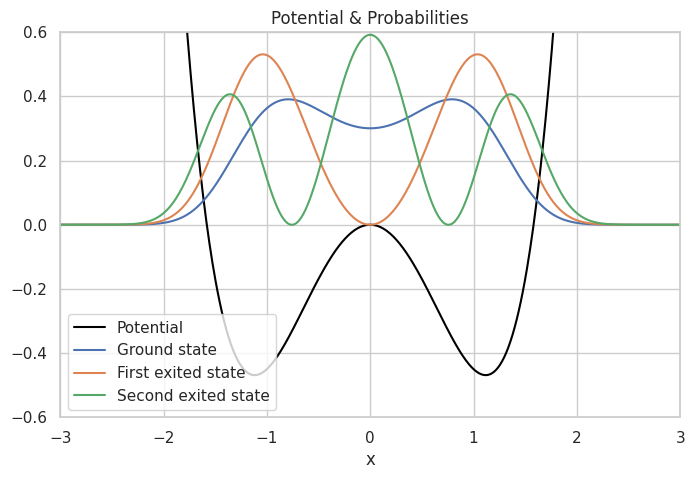

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2 , label = "Ground state")
plt.plot(x,(psi[1])**2 , label = "First exited state")
plt.plot(x,(psi[2])**2 , label = "Second exited state")
plt.legend(loc="best")
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

 # Excercise 08.2
 
 To optimize the parameters $\sigma$ and $\mu$ that minimize $\langle \hat{H} \rangle_T$ using a Simulated Annealing (SA) algorithm, we followed these steps:

We started with initial guesses for $\sigma$ and $\mu$, in particular  $\mu = 0.8$ and $\sigma = 0.6$. We chose an initial temperature $T_0=0.1$ and a cooling rate $\alpha =  0.995$. We used Variational Monte Carlo (VMC) to calculate $\langle \hat{H} \rangle_T$ for the current values of $\sigma$ and $\mu". We ran the simulation with enough statistics to get reliable estimates, with a total number of iterations of $5000$. 

We performed a series of SA iterations:
- We perturbed the parameters $\sigma$ and $\mu$ slightly (e.g., added random values to them).
- We recalculated $\langle \hat{H} \rangle_T$ for the new parameters (considering a total of throws of $10^4$).
- We calculated the energy change, $\Delta E = \langle \hat{H} \rangle_{T_{\text{new}}} - \langle \hat{H} \rangle_{T_{\text{current}}}$.
- We accepted the new parameters with probability $P(\Delta E, T_{\text{current}}) = \exp(-\Delta E / T_{\text{current}})$, where $T_{\text{current}}$ was the current temperature.
- We updated the parameters if they were accepted.
- We reduced the temperature using the cooling rate $\alpha$, e.g., $T_{\text{new}} = \alpha \cdot T_{\text{current}}$.


The choice of the initial temperature and cooling rate was crucial for the success of the SA algorithm. Too high an initial temperature may have led to poor convergence, while too low a cooling rate may have resulted in getting stuck in local minima. SA is a stochastic optimization method, and it explores the parameter space by accepting uphill moves with a decreasing probability as the temperature decreases. This allowed us to escape local minima and find global minima in the optimization landscape.

The success of SA depended on finding an appropriate balance between exploration (at higher temperatures) and exploitation (at lower temperatures).

As the SA algorithm progressed, we observed the evolution of $\langle \hat{H} \rangle_T$ as a function of SA steps. We meticulously tracked the energy landscape and its fluctuations, accounting for statistical uncertainties at each step. The resulting plot showed how the energy systematically decreased over time, illustrating the optimization process.


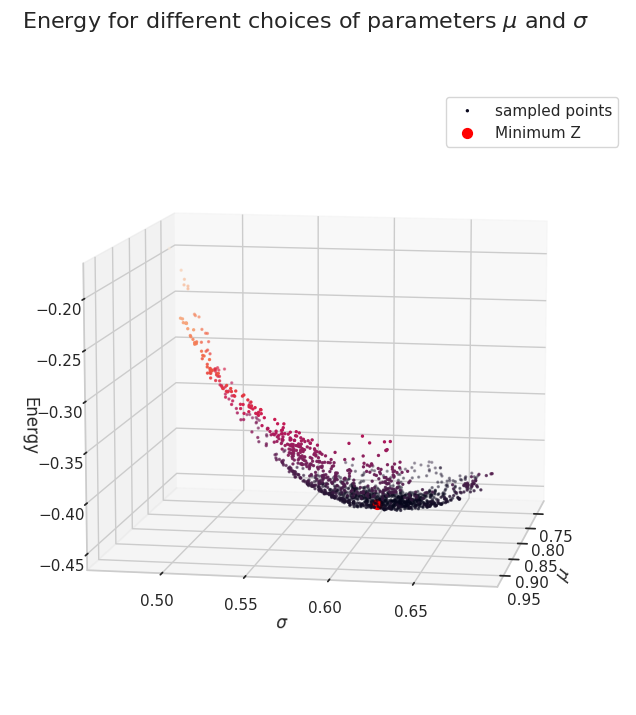

Optimal parameters :   mu -> 0.797051;    sigma -> 0.602289
Estimated energy :   mu -> -0.446777


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data from parameters.dat file
mu, sigma, Z = np.loadtxt('es_08.2/output/parameters.dat', unpack=True)

# Find the indices of minimum Z value
min_Z_idx = np.argmin(Z)
mu_min = mu[min_Z_idx]
sigma_min = sigma[min_Z_idx]

# Create a larger figure
fig = plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

ax = fig.add_subplot(111, projection='3d')
ax.scatter(mu, sigma, Z, c=Z, label='sampled points',marker="o", s=2)
ax.scatter(mu_min, sigma_min, Z[min_Z_idx], color="red", marker="o", s=50, label="Minimum Z")
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('Energy')
fig.suptitle(r'Energy for different choices of parameters $\mu$ and $\sigma$', fontsize=16)
ax.view_init(10, 10)
ax.legend()
plt.show()

print('Optimal parameters :   mu -> ' + str(mu_min) + ';    sigma -> ' + str(sigma_min))
print('Estimated energy :   mu -> ' + str(Z[min_Z_idx])  )




Having obtained the parameters that minimized $\langle \hat{H} \rangle_T$, we estimated this quantity with statistical uncertainty. We conducted extensive VMC simulations with 100 blocks, each consisting of $10^4$ Monte Carlo steps, to ensure accurate measurements. The resulting energy estimate was slightly higher than the predicted value. This discrepancy can be attributed to the fact that while the chosen parameters were good, they were not perfect. This imperfection led to a slight overestimation of the energy, highlighting the intricacies of optimizing quantum variational parameters.

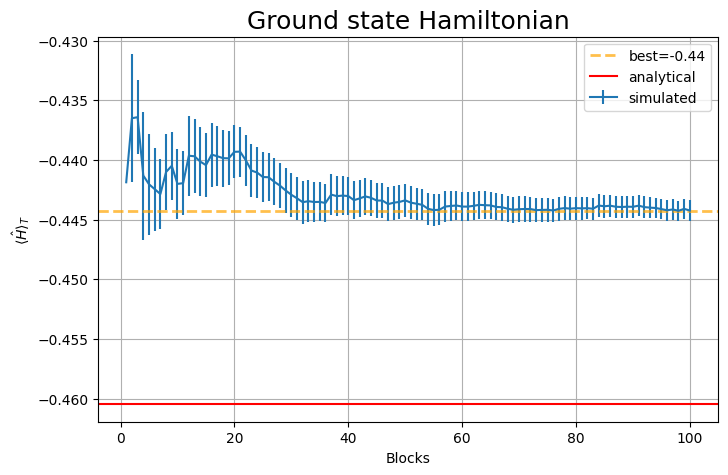

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from energy_DB.dat file, skipping the first row
x , energy, error_ene = np.loadtxt("es_08.2/output/energy_DB.dat", skiprows=1, unpack=True)
plt.style.use('default')
plt.figure(figsize=(8,5))
plt.errorbar( x , energy , yerr=error_ene  ,label="simulated")
plt.axhline(energy.min(), label=f'best={energy.min():.2f}', linestyle='--', lw=2,alpha=0.7, color='orange')
plt.axhline(E[0], label='analytical',color='red')
plt.legend()
plt.title("Ground state Hamiltonian" , fontsize= 18)
plt.xlabel("Blocks")
plt.ylabel("$\\langle \\hat{H} \\rangle _T$")
plt.grid()

To gain further insights into the wave function's behavior, we sampled $|\Psi_T(x)|^2$ by collecting configurations and constructing a histogram. We then compared this empirical distribution with the analytic curve of $|\Psi_T(x)|^2$ and with a numerical solution obtained by transforming the Schrödinger equation into a matrix equation. This comprehensive analysis allowed us to validate the accuracy of our wave function description and appreciate its agreement with theoretical predictions.


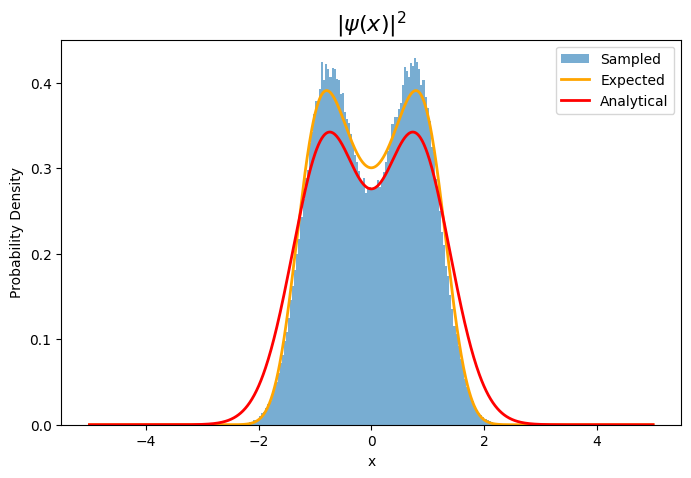

In [66]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

mu, sigma, Z = np.loadtxt('es_08.2/output/parameters.dat', unpack=True)
my_psi = np.loadtxt("es_08.2/output/histo_psi.dat", dtype=float,  unpack=True)

def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E, psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

mu_min = mu[np.argmin(Z)]
sigma_min = sigma[np.argmin(Z)]

# Define the function for the expected wavefunction
def psi_exact(x, mu, sigma):
    return (np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) + np.exp(-(x + mu) ** 2 / (2 * sigma ** 2))) / (2 * sigma * np.sqrt(2 * np.pi))

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.hist(my_psi, bins=150, density=True, label='Sampled', lw=0, alpha=0.6)
ax.plot(x, (psi[0])**2 , label="Expected" , lw=2, color='orange')
ax.plot(x, (psi_exact(x, mu_min, sigma_min)), label="Analytical", color="red", lw=2)
ax.set_title(r"$|\psi(x)|^2$", fontsize=16)
ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.legend(loc="best")

plt.show()


Through these visualizations and analyses, we successfully optimized the variational parameters $\sigma$ and $\mu$ to minimize $\langle \hat{H} \rangle_T$ using the SA algorithm. Our results showcased the effectiveness of the optimization process and provided valuable insights into the quantum system's behavior.